First 5 rows of the dataset:
   Customer ID  Age  Annual Income  Spending Score
0            1   19             15              39
1            2   21             16              81
2            3   20             17               6
3            4   23             18              77
4            5   31             19              40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Customer ID     200 non-null    int64
 1   Age             200 non-null    int64
 2   Annual Income   200 non-null    int64
 3   Spending Score  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB
None

Missing values in dataset:
Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

Summary Statistics:
       Customer ID         Age  Annual Income  Spending Score
count   200.000000  200.000000     200.00

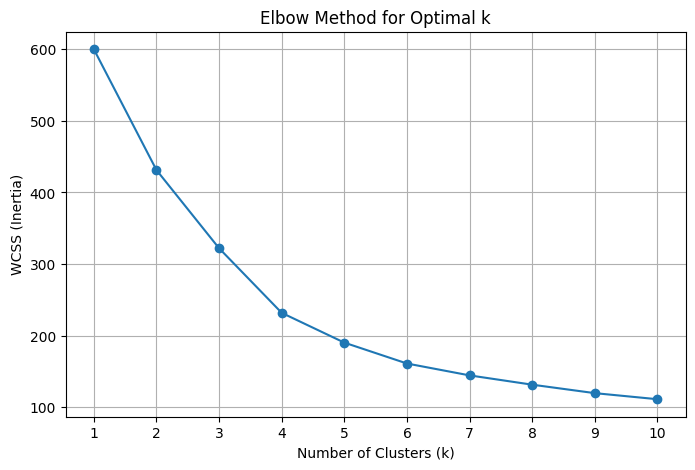

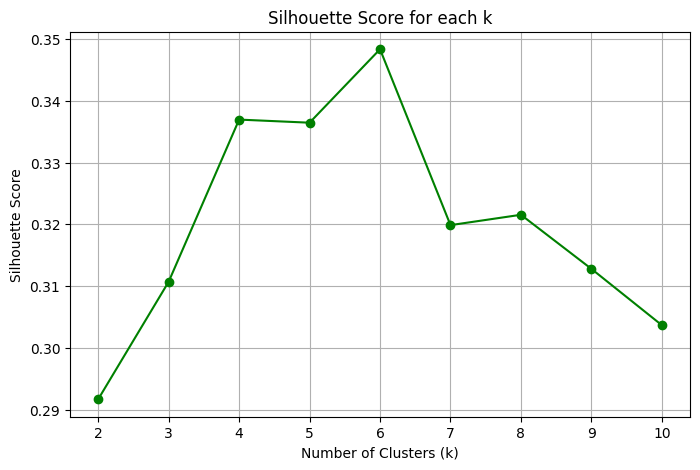


First 5 rows with cluster labels:
   Customer ID  Age  Annual Income  Spending Score  Cluster
0            1   19             15              39        2
1            2   21             16              81        2
2            3   20             17               6        0
3            4   23             18              77        2
4            5   31             19              40        2


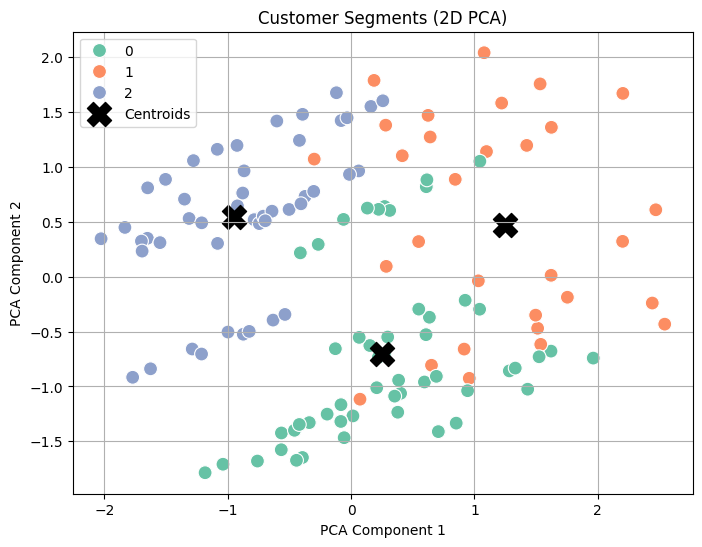

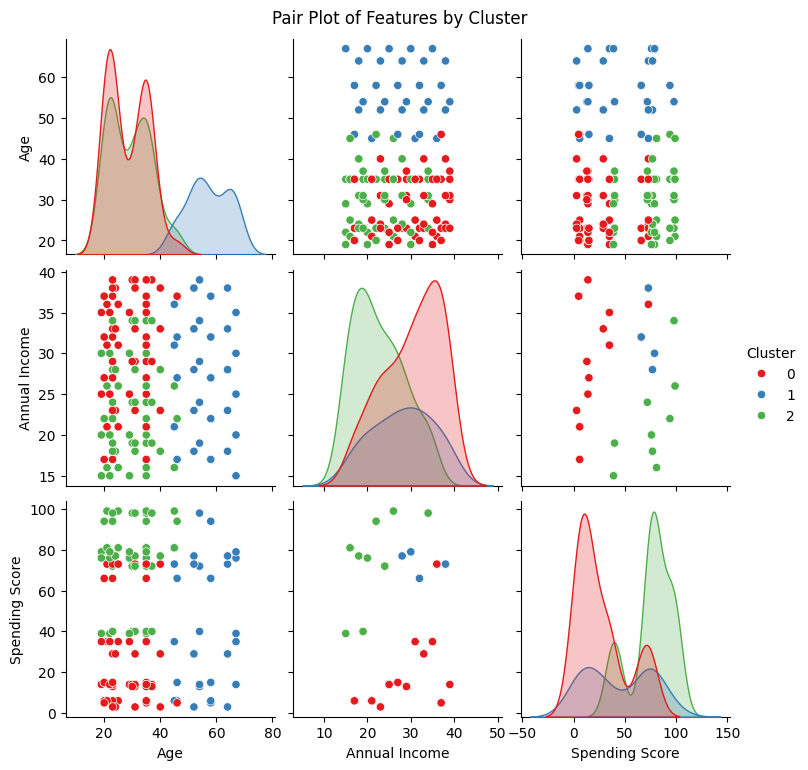


Cluster Centroids (Original Scale):
        Age  Annual Income  Spending Score
0 -0.445335       0.455180       -0.662462
1  1.688712       0.152543       -0.149365
2 -0.395934      -0.597227        0.830452

✅ Clustered dataset saved as 'customer_data_clustered.csv'


In [4]:
# STEP 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# STEP 2: Load the Dataset
df = pd.read_csv("customer_data.csv")

print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing values in dataset:")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe())

# STEP 3: Data Preprocessing

# Drop Customer ID (not useful for clustering)
features = df[['Age', 'Annual Income', 'Spending Score']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print("\nFirst 5 rows of scaled features:")
print(scaled_features[:5])

# STEP 4: Determine the Optimal Number of Clusters (Elbow Method + Silhouette Score)

# Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Silhouette Score (optional)
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score for each k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# STEP 5: Apply K-Means Clustering (Use Optimal k from Elbow)
optimal_k = 3  # Replace with the best k you choose
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print("\nFirst 5 rows with cluster labels:")
print(df.head())

# STEP 6: Visualization of Clusters

# 1. 2D Scatter Plot using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1],
                hue=df['Cluster'], palette='Set2', s=100)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0],
            pca.transform(kmeans.cluster_centers_)[:, 1],
            c='black', s=300, label='Centroids', marker='X')
plt.title('Customer Segments (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

# 2. Pair Plot (optional)
sns.pairplot(df[['Age', 'Annual Income', 'Spending Score', 'Cluster']], hue='Cluster', palette='Set1')
plt.suptitle("Pair Plot of Features by Cluster", y=1.02)
plt.show()

# 3. Centroid Visualization
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['Age', 'Annual Income', 'Spending Score'])
print("\nCluster Centroids (Original Scale):")
print(centroids)

# STEP 7: Save Clustered Dataset
df.to_csv("customer_data_clustered.csv", index=False)
print("\n✅ Clustered dataset saved as 'customer_data_clustered.csv'")
